# Term Project
## Kinnick Fox
## DSC550

# Milestone 1
#### For this project, I would like to focus on the crowdfunding platform Kickstarter. I have used Kickstarter for a few years now to fund some small projects that I believe should see a completed state. Kickstarter projects are often referred to as campaigns. Each campaign starts with a hard deadline at which time all funds must be accumulated from backers and meet or exceed the funding goal, also set at the beginning of the campaign. Backers are able to pledge any amount when backing a project and in some cases the creator of the project will set specific pledge amounts, also known as tiers, that will cause the backers of that amount or more to receive a physical or digital item from the campaign. There are many categories of projects on Kickstarter, many with subcategories that fall into certain niches. My goal with this project is to find which category and subcategory of project that has the highest likelihood of successfully funding during its campaign as well as decerning why that might be. The below Kaggle link points to the dataset that will be used for this project. It contains category, subcategory, start, end, funding goal, and final amount pledged data that will be important for the completion of this project. If possible, I would also like to find a dataset containing end of day totals throughout the duration of campaigns in order to predict a campaigns likelihood of success. This feature may not be possible if I need to create this dataset due to many campaigns lasting months at a time which would mean that the dataset would not providing enough data to work with before the end of this term. 
#### https://www.kaggle.com/datasets/ulrikthygepedersen/kickstarter-projects


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("kickstarter_projects.csv")

In [3]:
data["year"] = data.Deadline.str[:4]

In [4]:
data.year

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
374848    2018
374849    2018
374850    2018
374851    2018
374852    2018
Name: year, Length: 374853, dtype: object

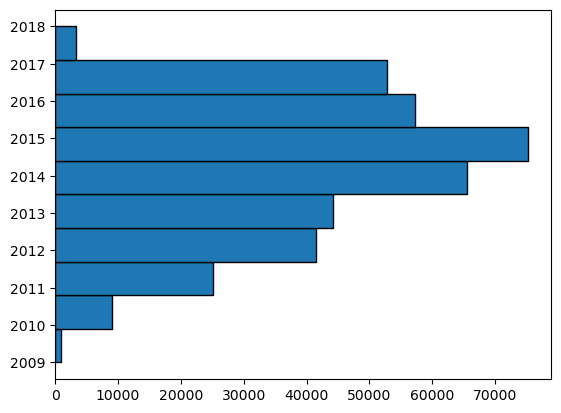

In [5]:
plt.hist(data.year, orientation="horizontal", edgecolor='black')
plt.show()

It appears that only a partial sample was taken from 2018 and that Kickstarter's popularity was at its highest in 2015.

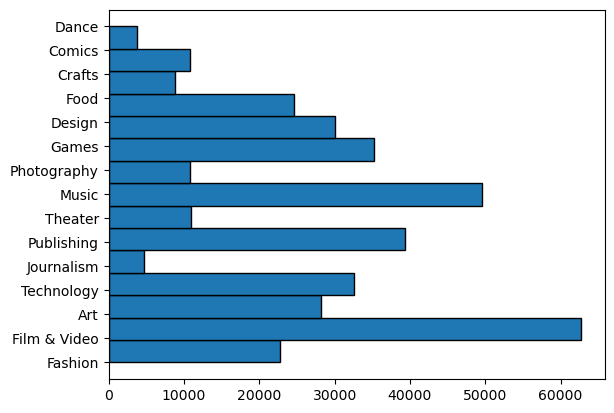

In [6]:
plt.hist(data.Category, bins = 15, orientation="horizontal", edgecolor='black')
plt.show()

It appears that the Film/Video is the most popular catagory on Kickstarter while Dance and Journalism is the least popular.

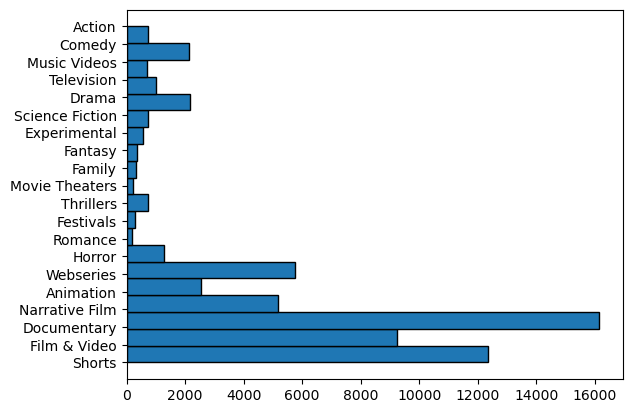

In [7]:
plt.hist(data[data["Category"] == "Film & Video"]["Subcategory"], bins = 20, orientation="horizontal", edgecolor='black')
plt.show()

Breaking down the most popular category by subcategory helps establish how many varients may need to be dealt with within this project. 

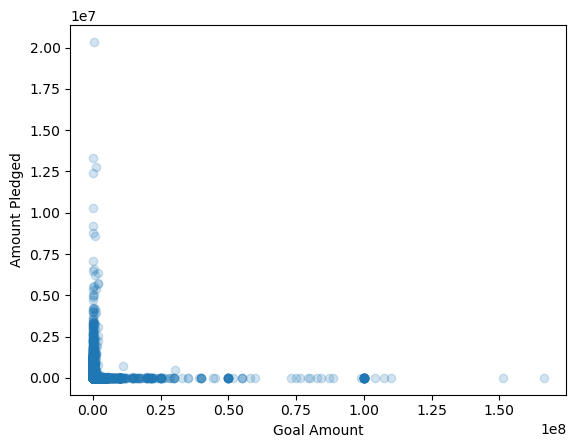

In [8]:
plt.scatter(data.Goal,data.Pledged, alpha = 0.2)
plt.xlabel("Goal Amount")
plt.ylabel("Amount Pledged")
plt.show()

It's clear that outliers exist in this data in the goal variable. These may need to be removed in future weeks. Either way, it appears that campaigns with a goal of less than $100,000 were more likely be be successful.

# Milestone 2

In [9]:
data = pd.read_csv("kickstarter_projects.csv")

In [10]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


#### Drop any ID duplicates

In [11]:
data.drop_duplicates(subset="ID")

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


#### Drop live projects. It is unclear if Live projects will be successful and would add inaccuracy to the model.

In [12]:
data = data[data["State"] != "Live"]

In [13]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,Successful
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,Canceled
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,Canceled
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,Canceled


#### Create column for average backer pledge

In [14]:
data["Avg"] = data["Pledged"] // data["Backers"]

C:\Users\minij\AppData\Local\Temp\ipykernel_38740\3846620857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Avg"] = data["Pledged"] // data["Backers"]


In [15]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Avg
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,20.0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,7.0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,11.0
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,5.0
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374605,801423615,Collaboration with Snoop Dogg,Music,Hip-Hop,Australia,2017-12-29 03:22:32,2018-01-01,392,514,6,Successful,85.0
374635,1315429286,Healthcare Web TV Network,Journalism,Web,United States,2017-12-29 21:06:11,2018-01-18,100000,0,0,Canceled,NaN
374703,1057488050,15 Games,Games,Tabletop Games,United States,2017-12-31 13:53:53,2018-01-05,1000,1,1,Canceled,1.0
374731,1854247643,100 Acres of Hell,Comics,Comic Books,United Kingdom,2018-01-01 00:54:41,2018-01-15,136,78,6,Canceled,13.0


#### Drop any canceled projects. On Kickstarter, canceled projects do not go for the time allocated and could skew results. 

In [16]:
data = data[data["State"] != "Canceled"]

In [17]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Avg
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,20.0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,7.0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,11.0
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,5.0
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful,7.0
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful,21.0
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful,33.0
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,37.0


#### Drop suspended for the same reasons as dropping canceled projects.

In [18]:
data = data[data["State"] != "Suspended"]

#### Change Launched and Deadline to datetime

In [19]:
data["Launched"] = pd.to_datetime(data["Launched"])

C:\Users\minij\AppData\Local\Temp\ipykernel_38740\3220859636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Launched"] = pd.to_datetime(data["Launched"])


In [20]:
data["Deadline"] = pd.to_datetime(data["Deadline"])

C:\Users\minij\AppData\Local\Temp\ipykernel_38740\2099890818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Deadline"] = pd.to_datetime(data["Deadline"])


#### Create a column for total allocated time.

In [21]:
data["Time"] = data["Deadline"] - data["Launched"]

C:\Users\minij\AppData\Local\Temp\ipykernel_38740\1935117620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Time"] = data["Deadline"] - data["Launched"]


In [22]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Avg,Time
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,20.0,39 days 02:57:12
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,7.0,87 days 23:52:07
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,11.0,8 days 02:07:57
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,5.0,79 days 06:23:39
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,38.0,28 days 09:49:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful,7.0,2 days 13:45:39
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful,21.0,4 days 10:59:36
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful,33.0,3 days 20:07:22
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,37.0,1 days 22:11:02


#### Create dummy variables for State

In [23]:
dummies = pd.get_dummies(data["State"])

In [24]:
data = data.drop("State", axis = 1)

In [25]:
data = data.join(dummies)

In [26]:
data = data.drop("Failed", axis = 1)

In [27]:
data

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,Avg,Time,Successful
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,20.0,39 days 02:57:12,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,7.0,87 days 23:52:07,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,11.0,8 days 02:07:57,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,5.0,79 days 06:23:39,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,38.0,28 days 09:49:21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374310,749399445,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,7.0,2 days 13:45:39,1
374400,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,21.0,4 days 10:59:36,1
374458,1411606124,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,33.0,3 days 20:07:22,1
374530,156799983,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,37.0,1 days 22:11:02,1


## Milestone 3

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import numpy as np
import datetime

##### Once I got into this milestone, I realised that more data transformations needed to happen before I could fit a logistic model with it. Creating dummy variables for category, subcategory, and country was required to see if any of these variables had a noteable correlation coefficient.

In [29]:
clean_data = data

In [30]:
clean_data["time_elapsed"] = clean_data["Time"].apply(lambda x: int(pd.Series(str(x).split(" days ")[0])))

In [31]:
clean_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [32]:
model_data = clean_data.dropna()

In [33]:
categories = pd.get_dummies(model_data["Category"],prefix="Category")
model_data = model_data.join(categories)

In [34]:
subcategories = pd.get_dummies(model_data["Subcategory"],prefix="Subcategory")
model_data = model_data.join(subcategories)

In [35]:
countries = pd.get_dummies(model_data["Country"],prefix="Country")
model_data = model_data.join(countries)

In [36]:
model_data = model_data.drop(["ID", "Name", "Category", "Subcategory", "Country", "Launched", "Deadline", "Time", "Pledged","Avg"], axis=1)

In [37]:
model_data.isnull().values.any()

False

In [38]:
model_data

,Goal,Backers,Successful,time_elapsed,Category_Art,Category_Comics,Category_Crafts,Category_Dance,Category_Design,Category_Fashion,...,Country_Mexico,Country_Netherlands,Country_New Zealand,Country_Norway,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Country_United States
0,1000,30,0,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,80000,3,0,87,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20,3,1,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,99,25,1,79,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1900,10,0,28,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374310,36,36,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374400,271,25,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
374458,200,6,1,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
374530,250,7,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### After making changes to the data, I began fitting the data with logistical regression. Logistical regression seemed like the right choice becaus ethe target feature is binary.

In [39]:
target = "Successful"
x = model_data.loc[:, model_data.columns != target].columns

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(model_data[x],model_data[target], test_size=0.2, random_state=10)

In [41]:
model = LogisticRegression().fit(xtrain,ytrain)

In [42]:
model.score(xtest,ytest)

0.8950738495688552

In [43]:
feature_coef = pd.DataFrame(zip(xtrain.columns, np.transpose(model.coef_)), columns=['features', 'coef'])

In [44]:
feature_coef.sort_values(by=["coef"],ascending=False)

,features,coef
9,Category_Film & Video,[0.6352877552199053]
13,Category_Music,[0.4924212955062913]
147,Subcategory_Shorts,[0.31640266899439684]
17,Category_Theater,[0.3082825086246921]
159,Subcategory_Theater,[0.20699222548149687]
...,...,...
154,Subcategory_Tabletop Games,[-0.20020391727679468]
7,Category_Design,[-0.25250698667577404]
166,Subcategory_Video Games,[-0.30223269187941654]
15,Category_Publishing,[-0.333614894269565]


##### Category, subcategory, and country features needed to be fitted seperately.

In [45]:
category_model1 = LogisticRegression().fit(categories,model_data[target])

In [46]:
cat_coef = pd.DataFrame(zip(categories.columns, np.transpose(category_model1.coef_)), columns=['features', 'coef'])

In [47]:
cat_coef.sort_values(by=["coef"],ascending=False)

,features,coef
3,Category_Dance,[0.9880341439311862]
14,Category_Theater,[0.9267404899225129]
1,Category_Comics,[0.6098947830775179]
10,Category_Music,[0.5505937782364076]
0,Category_Art,[0.2060338562229546]
6,Category_Film & Video,[0.0805920369904562]
8,Category_Games,[0.020616216620302576]
4,Category_Design,[-0.07692441078133919]
12,Category_Publishing,[-0.2086985873287951]
11,Category_Photography,[-0.23181474293901952]


In [48]:
category_model = sm.Logit(model_data[target],categories).fit()

Optimization terminated successfully.
         Current function value: 47.287198
         Iterations 5


In [49]:
category_model.summary()

C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Successful   No. Observations:               292825
Model:                          Logit   Df Residuals:                   292810
Method:                           MLE   Df Model:                           14
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                     inf
Time:                        21:01:55   Log-Likelihood:            -1.3847e+07
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Category_Art              0.0365      0.013      2.740      0.006       0.010       0.063
Category_Comics           0.4407      0.021     21.076      0.000       0.400       0.482
Category_Crafts          -0.7443      0.026    -28.184      0.000      -0.796      -0.693
Category_Dance            0.8197      0.037     21.919      0.000       0.746       0.893
Category_Design          -0.2465      0.013    -18.969      0.000      -0.272      -0.221
Category_Fashion         -0.6541      0.016    -39.681      0.000      -0.686      -0.622
Category_Film & Video    -0.0890      0.009     -9.884      0.000      -0.107      -0.071
Category_Food            -0.7427      0.016    -47.688      0.000      -0.773      -0.712
Category_Games           -0.1490      0.012    -12.217      0.000      -0.173      -0.125
Category_Journalism      -0.7950      0.038    -20.991      0.000      -0.869      -0.721
Category_Music            0.3811      0.010     37.691      0.000       0.361       0.401
Category_Photography     -0.4013      0.022    -17.856      0.000      -0.445      -0.357
Category_Publishing      -0.3783      0.012    -32.318      0.000      -0.401      -0.355
Category_Technology      -0.9472      0.015    -64.491      0.000      -0.976      -0.918
Category_Theater          0.7576      0.022     34.598      0.000       0.715       0.801
=========================================================================================
"""

##### Nothing all that exciting here which makes sense as it is a fairly broad feature group. The P value indicated that all catagories carry significance.

In [50]:
subcategory_model1 = LogisticRegression().fit(subcategories,model_data[target])

C:\Users\minij\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
subcat_coef = pd.DataFrame(zip(subcategories.columns, np.transpose(subcategory_model1.coef_)), columns=['features', 'coef'])

In [52]:
subcat_coef.sort_values(by=["coef"],ascending=False)

,features,coef
21,Subcategory_Chiptune,[1.6376316386278986]
122,Subcategory_Residencies,[1.471203592948301]
6,Subcategory_Anthologies,[1.3005773519361845]
36,Subcategory_Dance,[1.2586507862895115]
72,Subcategory_Indie Rock,[1.2313833170714126]
...,...,...
131,Subcategory_Software,[-1.236392936604073]
59,Subcategory_Food Trucks,[-1.2443019702909552]
151,Subcategory_Web,[-1.4736244297951198]
88,Subcategory_Mobile Games,[-1.5326639024161217]


In [53]:
subcategory_model = sm.Logit(model_data[target],subcategories).fit()

Optimization terminated successfully.
         Current function value: 67.316201
         Iterations 6


In [54]:
subcategory_model.summary()

C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Successful   No. Observations:               292825
Model:                          Logit   Df Residuals:                   292666
Method:                           MLE   Df Model:                          158
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                     inf
Time:                        21:02:23   Log-Likelihood:            -1.9712e+07
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Subcategory_3D Printing           -0.1946      0.087     -2.243      0.025      -0.365      -0.025
Subcategory_Academic              -0.7699      0.088     -8.727      0.000      -0.943      -0.597
Subcategory_Accessories           -0.2632      0.041     -6.482      0.000      -0.343      -0.184
Subcategory_Action                -1.2021      0.110    -10.904      0.000      -1.418      -0.986
Subcategory_Animals               -0.7768      0.152     -5.103      0.000      -1.075      -0.478
Subcategory_Animation             -0.5848      0.048    -12.240      0.000      -0.679      -0.491
Subcategory_Anthologies            1.0140      0.085     11.942      0.000       0.848       1.180
Subcategory_Apparel               -0.8478      0.032    -26.675      0.000      -0.910      -0.786
Subcategory_Apps                  -2.2446      0.054    -41.496      0.000      -2.351      -2.139
Subcategory_Architecture          -0.7864      0.090     -8.721      0.000      -0.963      -0.610
Subcategory_Art                    0.0666      0.025      2.693      0.007       0.018       0.115
Subcategory_Art Books              0.3537      0.042      8.366      0.000       0.271       0.437
Subcategory_Audio                 -0.5000      0.120     -4.156      0.000      -0.736      -0.264
Subcategory_Bacon                 -0.8283      0.194     -4.260      0.000      -1.209      -0.447
Subcategory_Blues                  0.1570      0.136      1.153      0.249      -0.110       0.424
Subcategory_Calendars             -0.0383      0.124     -0.309      0.757      -0.281       0.204
Subcategory_Camera Equipment       0.2671      0.110      2.437      0.015       0.052       0.482
Subcategory_Candles               -1.5181      0.149    -10.197      0.000      -1.810      -1.226
Subcategory_Ceramics               0.1292      0.127      1.015      0.310      -0.120       0.379
Subcategory_Children's Books      -0.3152      0.027    -11.613      0.000      -0.368      -0.262
Subcategory_Childrenswear         -0.9716      0.120     -8.066      0.000      -1.208      -0.735
Subcategory_Chiptune               1.6864      0.487      3.464      0.001       0.732       2.641
Subcategory_Civic Design          -0.2829      0.130     -2.178      0.029      -0.537      -0.028
Subcategory_Classical Music        0.8671      0.045     19.141      0.000       0.778       0.956
Subcategory_Comedy                 0.0906      0.048      1.891      0.059      -0.003       0.185
Subcategory_Comic Books            0.6614      0.043     15.504      0.000       0.578       0.745
Subcategory_Comics                 0.2726      0.030      8.973      0.000       0.213       0.332
Subcategory_Community Gardens     -0.9751      0.144     -6.751      0.000      -1.258      -0.692
Subcategory_Conceptual Art        -0.1887      0.071     -2.670      0.008      -0.327      -0.050
Subcategory_Cookbooks             -0.6337      0.109     -5.840      0.00

##### After investigating features with high P values, any feature with less than 300 data points should be removed.  

In [55]:
len(model_data[model_data["Subcategory_Taxidermy"]==1])

10

In [56]:
len(model_data[model_data["Subcategory_Blues"]==1])

217

In [57]:
len(model_data[model_data["Subcategory_Calendars"]==1])

261

In [58]:
len(model_data[model_data["Subcategory_Ceramics"]==1])

248

In [59]:
county_model1 = LogisticRegression().fit(countries,model_data[target])

county_coef = pd.DataFrame(zip(countries.columns, np.transpose(county_model1.coef_)), columns=['features', 'coef'])

county_coef.sort_values(by=["coef"],ascending=False)

,features,coef
7,Country_Hong Kong,[0.5242733333173674]
21,Country_United States,[0.3950943015194249]
20,Country_United Kingdom,[0.37437140293865356]
4,Country_Denmark,[0.30921070145279467]
16,Country_Singapore,[0.22202742005100698]
5,Country_France,[0.19188442634736758]
14,Country_New Zealand,[0.1063233247981489]
3,Country_Canada,[0.08584082292988794]
18,Country_Sweden,[0.06303972394450169]
11,Country_Luxembourg,[-0.004593331015587865]


In [60]:
country_model = sm.Logit(model_data[target],countries).fit()

Optimization terminated successfully.
         Current function value: 26.105069
         Iterations 5


In [61]:
country_model.summary()

C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\minij\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Successful   No. Observations:               292825
Model:                          Logit   Df Residuals:                   292803
Method:                           MLE   Df Model:                           21
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                     inf
Time:                        21:02:28   Log-Likelihood:            -7.6442e+06
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Country_Australia         -0.5936      0.028    -21.359      0.000      -0.648      -0.539
Country_Austria           -1.0540      0.112     -9.389      0.000      -1.274      -0.834
Country_Belgium           -0.7030      0.099     -7.088      0.000      -0.897      -0.509
Country_Canada            -0.4297      0.020    -21.503      0.000      -0.469      -0.391
Country_Denmark           -0.2007      0.071     -2.824      0.005      -0.340      -0.061
Country_France            -0.3228      0.044     -7.409      0.000      -0.408      -0.237
Country_Germany           -0.7441      0.040    -18.754      0.000      -0.822      -0.666
Country_Hong Kong          0.0093      0.096      0.096      0.923      -0.180       0.198
Country_Ireland           -0.6101      0.086     -7.066      0.000      -0.779      -0.441
Country_Italy             -1.2024      0.054    -22.091      0.000      -1.309      -1.096
Country_Japan             -0.6931      0.463     -1.497      0.134      -1.600       0.214
Country_Luxembourg        -0.5213      0.290     -1.800      0.072      -1.089       0.046
Country_Mexico            -0.5909      0.063     -9.433      0.000      -0.714      -0.468
Country_Netherlands       -0.8079      0.048    -16.689      0.000      -0.903      -0.713
Country_New Zealand       -0.4070      0.061     -6.674      0.000      -0.526      -0.287
Country_Norway            -0.6807      0.096     -7.060      0.000      -0.870      -0.492
Country_Singapore         -0.2905      0.099     -2.931      0.003      -0.485      -0.096
Country_Spain             -0.7485      0.055    -13.679      0.000      -0.856      -0.641
Country_Sweden            -0.4522      0.057     -7.975      0.000      -0.563      -0.341
Country_Switzerland       -0.6770      0.090     -7.538      0.000      -0.853      -0.501
Country_United Kingdom    -0.1402      0.012    -11.264      0.000      -0.165      -0.116
Country_United States     -0.1196      0.004    -28.770      0.000      -0.128      -0.111
==========================================================================================
"""

##### Similarly to the Subcategory outlier discovery, low datapoint count is causing a few features to be insignificant.

In [62]:
len(model_data[model_data["Country_Hong Kong"]==1])

430

In [63]:
len(model_data[model_data["Country_Japan"]==1])

21

In [64]:
len(model_data[model_data["Country_Luxembourg"]==1])

51

# Milestone 4: Final Submission

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [66]:
pred = model.predict(xtest)

In [67]:
cm = confusion_matrix(ytest,pred)

<AxesSubplot:>

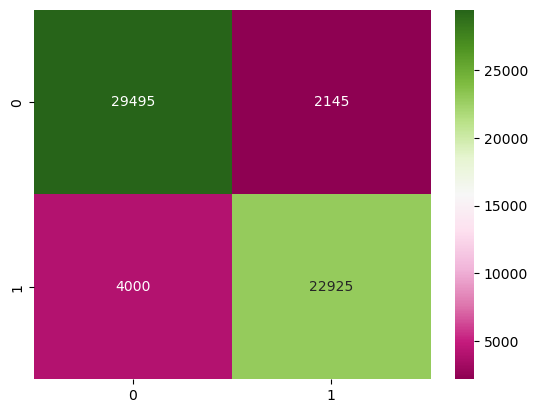

In [68]:
sns.heatmap(cm,annot=True,cmap="PiYG",fmt='g')